In [50]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from tqdm import tqdm
import wandb
import matplotlib.pyplot as plt
epochs = 20

In [51]:
def set_seed(seed = 42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True

set_seed(42)

In [52]:
wandb.init(project="CNN on MNIST pytorch", save_code=True,
           config={
               "batch_size": 128,
               "epochs": 20,
               "optimizer": "Adam",
               "loss function": "CrossEntropyLoss",
           }
           )

config = wandb.config

wandb: ERROR Unable to save notebook session history.


train_accuracy,▁▁▃▃▃▄▄▄▄▄▅▅▅▆▆▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇████████
train_loss,██▇▆▆▅▅▄▄▄▄▄▄▄▃▂▃▂▂▂▂▂▂▂▂▁▁▁▂▂▂▁▂▂▁▁▁▁▁▁
train_accuracy,82.565
train_loss,0.19997


In [53]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"using device {device}")

using device cuda:0


In [54]:
#Prepare the MNIST dataset in this cell
''
train_transform = transforms.Compose([transforms.ToTensor(),
                                transforms.RandomRotation(degrees=10),
                                transforms.RandomAffine(degrees=0, translate=(0.2, 0.2), scale=(0.7, 1.3)),
                                transforms.Normalize((0.1307,), (0.3081,))])
''
test_transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.1307,), (0.3081,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=train_transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=test_transform)
print(f"training data shape: {trainset.data.shape}")
print(f"training labels shape: {trainset.targets.shape}")
print(f"testing data shape: {testset.data.shape}")
print(f"testing labels shape: {testset.targets.shape}")
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle = True)

training data shape: torch.Size([60000, 28, 28])
training labels shape: torch.Size([60000])
testing data shape: torch.Size([10000, 28, 28])
testing labels shape: torch.Size([10000])


In [55]:
'''
class Neural_network(nn.Module):
    def __init__(self):
        super(Neural_network, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)#output dim = 14x14x8
        self.conv2 = nn.Conv2d(16, 28, 3, padding =1)#output dim = 7x7x16
        #self.dropout = nn.Dropout(p=0.15)
        self.normalization1 = nn.BatchNorm2d(16)
        self.normalization2 = nn.BatchNorm2d(28)
        self.normalization3 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(28, 32, 3, padding =1)#output dim = 3x3x20
        #self.fc1 = nn.Linear(4*4*32, 16)
        self.fc2 = nn.Linear(32, 10)
        #self.fc3 = nn.Linear(16, 10)
        self.pool = nn.MaxPool2d(2, 2)
        self.gap = nn.AdaptiveAvgPool2d((1, 1))
    def forward(self,x):
        x= self.pool(F.leaky_relu(self.normalization1(self.conv1(x))))
        x= self.pool(F.leaky_relu(self.normalization2(self.conv2(x))))
        x= F.leaky_relu(self.normalization3(self.conv3(x)))
        #print(f"Shape after conv3 and pool: {x.shape}")
        x = self.gap(x)
        x= x.view(-1, 32)
        #x= F.leaky_relu(self.fc1(x))
        #x = self.dropout(x)
        x = self.fc2(x)
        #x = self.fc3(x)
        return x
    
net = Neural_network()
net.to(device)
'''

'\nclass Neural_network(nn.Module):\n    def __init__(self):\n        super(Neural_network, self).__init__()\n        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)#output dim = 14x14x8\n        self.conv2 = nn.Conv2d(16, 28, 3, padding =1)#output dim = 7x7x16\n        #self.dropout = nn.Dropout(p=0.15)\n        self.normalization1 = nn.BatchNorm2d(16)\n        self.normalization2 = nn.BatchNorm2d(28)\n        self.normalization3 = nn.BatchNorm2d(32)\n        self.conv3 = nn.Conv2d(28, 32, 3, padding =1)#output dim = 3x3x20\n        #self.fc1 = nn.Linear(4*4*32, 16)\n        self.fc2 = nn.Linear(32, 10)\n        #self.fc3 = nn.Linear(16, 10)\n        self.pool = nn.MaxPool2d(2, 2)\n        self.gap = nn.AdaptiveAvgPool2d((1, 1))\n    def forward(self,x):\n        x= self.pool(F.leaky_relu(self.normalization1(self.conv1(x))))\n        x= self.pool(F.leaky_relu(self.normalization2(self.conv2(x))))\n        x= F.leaky_relu(self.normalization3(self.conv3(x)))\n        #print(f"Shape after con

In [56]:
class Neural_network(nn.Module):
    def __init__(self):
        super(Neural_network, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 5, padding=2)#output dim = 14x14x8
        self.conv2 = nn.Conv2d(16, 22, 5, padding =2)#output dim = 7x7x16
        self.conv3 = nn.Conv2d(22, 14, 5)#output dim = 3x3x20
        self.fc1 = nn.Linear(14, 21)
        self.fc2 = nn.Linear(21, 10)
        #self.fc3 = nn.Linear(16, 10)
        self.pool = nn.MaxPool2d(2, 2)
        self.normalization1 = nn.BatchNorm2d(16)
        self.normalization2 = nn.BatchNorm2d(22)
        self.normalization3 = nn.BatchNorm2d(14)
        self.gap = nn.AdaptiveAvgPool2d((1, 1))
    def forward(self,x):


        x = self.conv1(x)
        x = self.normalization1(x)
        x = F.leaky_relu(x)
        x = self.pool(x)


        x = self.conv2(x)
        x = self.normalization2(x)
        x = F.leaky_relu(x)
        x = self.pool(x)
        x = self.conv3(x)


        x = self.normalization3(x)
        x = F.leaky_relu(x)

        x = self.gap(x)
        #print(f"Shape after conv3 and pool: {x.shape}")
        x= x.view(-1, 14)# understand the math of this line
        x= F.leaky_relu(self.fc1(x))

        
        x = self.fc2(x)
        #x = self.fc3(x)
        return x
    
net = Neural_network()
net.to(device)

Neural_network(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(16, 22, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv3): Conv2d(22, 14, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=14, out_features=21, bias=True)
  (fc2): Linear(in_features=21, out_features=10, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (normalization1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (normalization2): BatchNorm2d(22, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (normalization3): BatchNorm2d(14, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (gap): AdaptiveAvgPool2d(output_size=(1, 1))
)

In [57]:
total_params = sum(p.numel() for p in net.parameters())
print(f"Total number of parameters in the model: {total_params}")

Total number of parameters in the model: 17591


In [58]:
from sched import scheduler


loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)#does net.parameters just make a vector of all the parameters in the model?
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

In [59]:
print(f"{trainloader}")

In [60]:
#have to decide how to train the model in this cell ie epochs, batch size, backpropagation etc.
'''
epochs = 20
for epoch in range(epochs):
    dynamic_loss = 0.0
    for i,data in enumerate(trainloader):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = loss_function(outputs, F.one_hot(labels, num_classes=10).float())
        loss.backward()
        optimizer.step()
        dynamic_loss += loss
        if i%200 ==99:
            print(f"epoch {epoch+1}, batch {i+1}, loss: {dynamic_loss/400}")
            dynamic_loss = 0.0 
'''

'\nepochs = 20\nfor epoch in range(epochs):\n    dynamic_loss = 0.0\n    for i,data in enumerate(trainloader):\n        inputs, labels = data[0].to(device), data[1].to(device)\n        optimizer.zero_grad()\n        outputs = net(inputs)\n        loss = loss_function(outputs, F.one_hot(labels, num_classes=10).float())\n        loss.backward()\n        optimizer.step()\n        dynamic_loss += loss\n        if i%200 ==99:\n            print(f"epoch {epoch+1}, batch {i+1}, loss: {dynamic_loss/400}")\n            dynamic_loss = 0.0 \n'

In [61]:
'''
from tqdm import tqdm
pbar = tqdm(trainloader, desc=f"Epoch {epoch+1}")
for batch_idx, (data,target) in enumerate(pbar):
    inputs, labels = data[0].to(device), data[1].to(device)
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = loss_function(outputs, F.one_hot(labels, num_classes=10).float())
    loss.backward()
    optimizer.step()
    pbar.set_postfix({'loss': loss.item()})
    wandb.log({"train_loss": loss.item()})
    dynamic_loss += loss
    if i%200 ==99:
        print(f"epoch {epoch+1}, batch {i+1}, loss: {dynamic_loss/400}")
        dynamic_loss = 0.0 
'''

'\nfrom tqdm import tqdm\npbar = tqdm(trainloader, desc=f"Epoch {epoch+1}")\nfor batch_idx, (data,target) in enumerate(pbar):\n    inputs, labels = data[0].to(device), data[1].to(device)\n    optimizer.zero_grad()\n    outputs = net(inputs)\n    loss = loss_function(outputs, F.one_hot(labels, num_classes=10).float())\n    loss.backward()\n    optimizer.step()\n    pbar.set_postfix({\'loss\': loss.item()})\n    wandb.log({"train_loss": loss.item()})\n    dynamic_loss += loss\n    if i%200 ==99:\n        print(f"epoch {epoch+1}, batch {i+1}, loss: {dynamic_loss/400}")\n        dynamic_loss = 0.0 \n'

In [62]:
def train(net, device, train_loader, optimizer, epoch):
    net.train()
    # tqdm creates the progress bar
    pbar = tqdm(train_loader, desc=f"Epoch {epoch}")
    train_correct =0
    train_total =0
    for i, (data, target) in enumerate(pbar):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        outputs = net(data)
        loss = loss_function(outputs, target)
        loss.backward()
        optimizer.step()
        _, train_predicted = torch.max(outputs, 1)
        train_total += len(target)
        train_correct += (train_predicted == target).sum().item()
        # Update the bar with the latest loss
        pbar.set_description(desc=f'Epoch {epoch} Loss={loss.item():.4f}')
        
        # Log training loss to wandb
        wandb.log({"train_loss": loss.item(), "train_accuracy": 100.0 * train_correct / train_total})
        pbar.set_postfix({'loss': loss.item(), 'train_accuracy': 100.0 * train_correct / train_total})

def test(net, device, testloader):
    net.eval()
    correct_labels = 0
    test_loss = 0
    misclassified_images = []
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            test_loss += loss_function(outputs, labels).item()
            #print(f"outputs.data = {outputs.data}")
            _, predicted = torch.max(outputs, 1)
            #if (predicted == labels).sum().item():
            correct_labels += (predicted == labels).sum().item()
            wrong_labels = (predicted != labels).nonzero(as_tuple=False).view(-1)
            #print(f"wrong_labels: {wrong_labels}")
            for idx in wrong_labels:
                if len(misclassified_images) < 10:
                    misclassified_images.append({
                        'img': images[idx].cpu(),
                        'predicted': predicted[idx].cpu(),
                        'actual': labels[idx].cpu()
                    })
    if misclassified_images:
        fig = plt.figure(figsize=(10, 5))
        for i, item in enumerate(misclassified_images):
            ax = fig.add_subplot(2, 5, i+1, xticks =[], yticks = [])
            ax.imshow(item['img'].squeeze(), cmap='gray')
            ax.set_title(f"True: {item['actual'].item()}, Pred: {item['predicted'].item()}")
    plt.show()

    test_loss /= len(testloader.dataset)
    accuracy = 100.0 * correct_labels / len(testloader.dataset)
    wandb.log({"test_accuracy": accuracy, "test_loss": test_loss})
    print(f"\n Test Set: Accuracy: {accuracy:.4f}%, test_loss: {test_loss} \n")
# Log test results to wandb
    return accuracy

In [63]:
'''
def plot_misclassified_images(misclassified_images, misclassified_labels, predicted_labels):
    plt.figure(figsize=(12,5))
    for i,item in enumerate(misclassified_images):
        if i >= 25:
            break
        plt.subplot(5, 5, i+1)
        plt.imshow(item.squeeze(), cmap='gray')
        plt.title(f"True: {misclassified_labels[i]}, Pred: {predicted_labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    for i in range(min(25, len(misclassified_images))):
        plt.subplot(5, 5, i+1)
        plt.imshow(misclassified_images[i].squeeze(), cmap='gray')
        plt.title(f"True: {misclassified_labels[i]}, Pred: {predicted_labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()'''

'\ndef plot_misclassified_images(misclassified_images, misclassified_labels, predicted_labels):\n    plt.figure(figsize=(12,5))\n    for i,item in enumerate(misclassified_images):\n        if i >= 25:\n            break\n        plt.subplot(5, 5, i+1)\n        plt.imshow(item.squeeze(), cmap=\'gray\')\n        plt.title(f"True: {misclassified_labels[i]}, Pred: {predicted_labels[i]}")\n        plt.axis(\'off\')\n    plt.tight_layout()\n    plt.show()\n    for i in range(min(25, len(misclassified_images))):\n        plt.subplot(5, 5, i+1)\n        plt.imshow(misclassified_images[i].squeeze(), cmap=\'gray\')\n        plt.title(f"True: {misclassified_labels[i]}, Pred: {predicted_labels[i]}")\n        plt.axis(\'off\')\n    plt.tight_layout()\n    plt.show()'

In [64]:
'''correct_labels = 0
total_labels = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        probs = F.softmax(outputs, dim =1)
        #print(f"outputs.data = {outputs.data}")
        _, predicted = torch.max(probs, 1)
        total_labels += labels.size(0)
        #if (predicted == labels).sum().item():
        correct_labels += (predicted == labels).sum().item()
        wandb.log({"test_accuracy": 100*correct_labels/total_labels})
print(f"accuracy of the network on the 10000 test images: {100*correct_labels/total_labels} %")
'''

'correct_labels = 0\ntotal_labels = 0\nwith torch.no_grad():\n    for data in testloader:\n        images, labels = data[0].to(device), data[1].to(device)\n        outputs = net(images)\n        probs = F.softmax(outputs, dim =1)\n        #print(f"outputs.data = {outputs.data}")\n        _, predicted = torch.max(probs, 1)\n        total_labels += labels.size(0)\n        #if (predicted == labels).sum().item():\n        correct_labels += (predicted == labels).sum().item()\n        wandb.log({"test_accuracy": 100*correct_labels/total_labels})\nprint(f"accuracy of the network on the 10000 test images: {100*correct_labels/total_labels} %")\n'

Epoch 1 Loss=0.2000: 100%|██████████| 938/938 [01:55<00:00,  8.12it/s, loss=0.2, train_accuracy=82.6]   


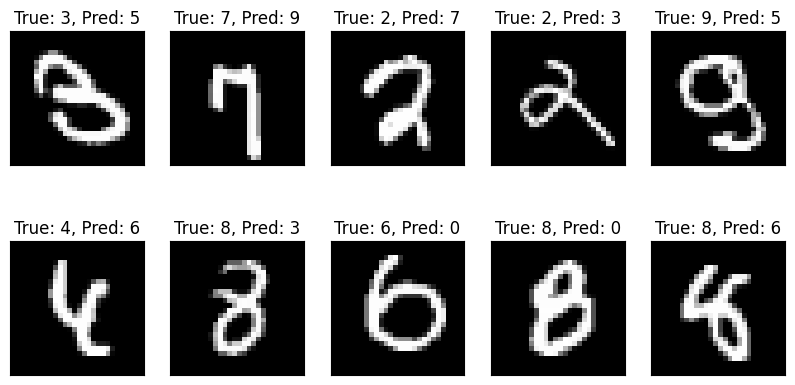


 Test Set: Accuracy: 96.8700%, test_loss: 0.0014463310131337494 



Epoch 2 Loss=0.0960: 100%|██████████| 938/938 [01:54<00:00,  8.18it/s, loss=0.096, train_accuracy=94.7] 


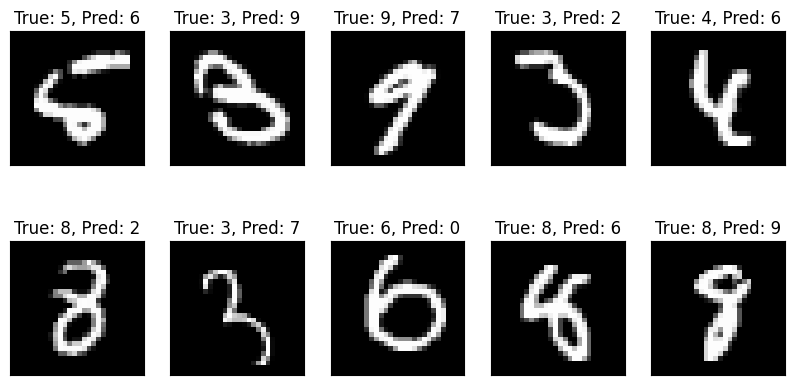


 Test Set: Accuracy: 98.2700%, test_loss: 0.0008634206339833327 



Epoch 3 Loss=0.1380: 100%|██████████| 938/938 [00:55<00:00, 17.00it/s, loss=0.138, train_accuracy=95.6] 


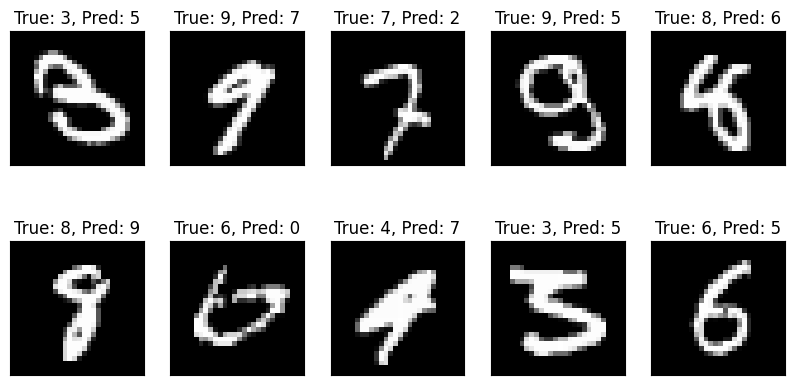


 Test Set: Accuracy: 98.4900%, test_loss: 0.0006326577275758609 



Epoch 4 Loss=0.0938: 100%|██████████| 938/938 [00:54<00:00, 17.17it/s, loss=0.0938, train_accuracy=96.2]


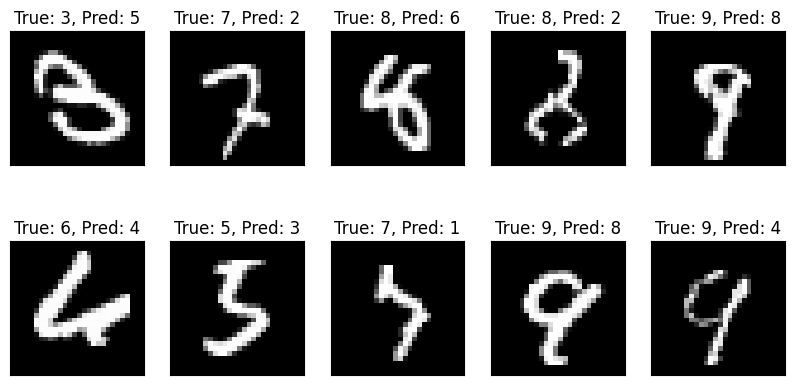


 Test Set: Accuracy: 99.1200%, test_loss: 0.00045174537799757674 



Epoch 5 Loss=0.0095: 100%|██████████| 938/938 [00:55<00:00, 16.92it/s, loss=0.00955, train_accuracy=96.6]


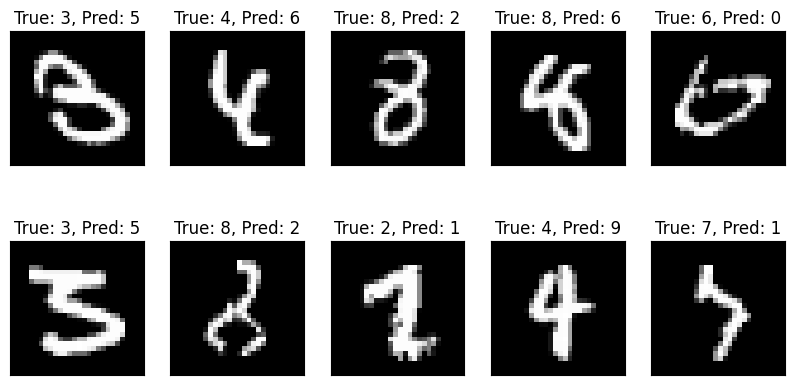


 Test Set: Accuracy: 98.7500%, test_loss: 0.0006040767942045932 



Epoch 6 Loss=0.5927: 100%|██████████| 938/938 [00:55<00:00, 16.83it/s, loss=0.593, train_accuracy=96.8]  


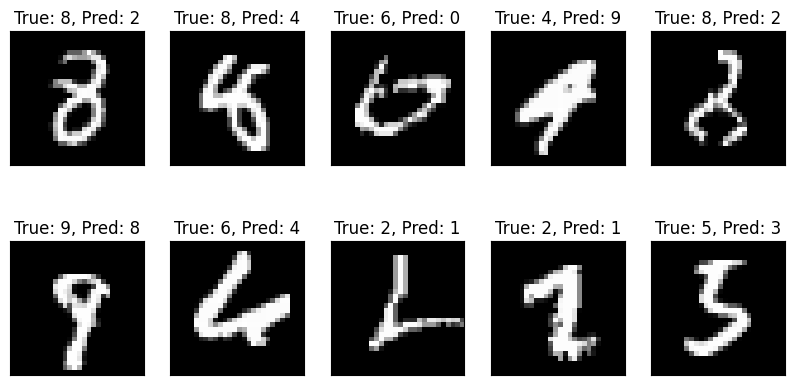


 Test Set: Accuracy: 98.8700%, test_loss: 0.0005023865458380896 



Epoch 7 Loss=0.3533: 100%|██████████| 938/938 [02:14<00:00,  6.97it/s, loss=0.353, train_accuracy=97]    


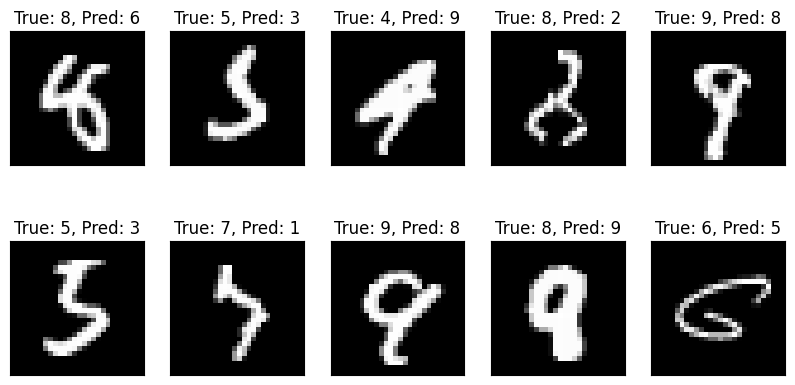


 Test Set: Accuracy: 99.2000%, test_loss: 0.00039189110576371604 



Epoch 8 Loss=0.0890: 100%|██████████| 938/938 [04:10<00:00,  3.75it/s, loss=0.089, train_accuracy=97]    


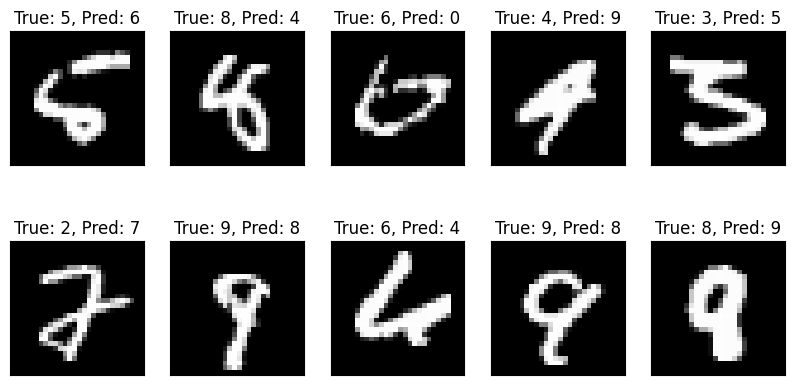


 Test Set: Accuracy: 99.1200%, test_loss: 0.0003985341312327364 



Epoch 9 Loss=0.2348: 100%|██████████| 938/938 [04:11<00:00,  3.73it/s, loss=0.235, train_accuracy=97.2]  


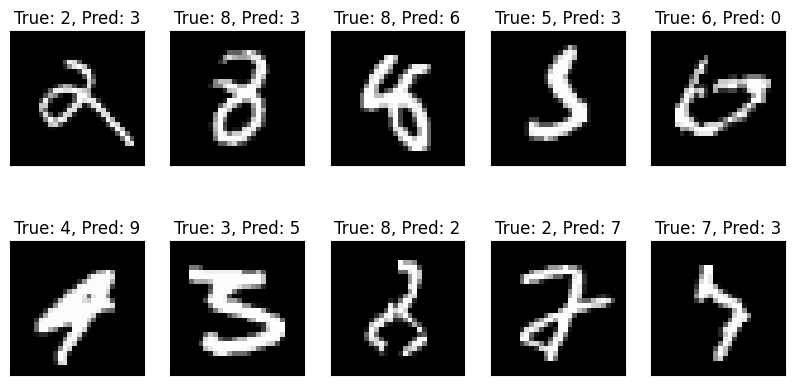


 Test Set: Accuracy: 99.0700%, test_loss: 0.0003743603291002728 



Epoch 10 Loss=0.0108: 100%|██████████| 938/938 [04:12<00:00,  3.71it/s, loss=0.0108, train_accuracy=97.4] 


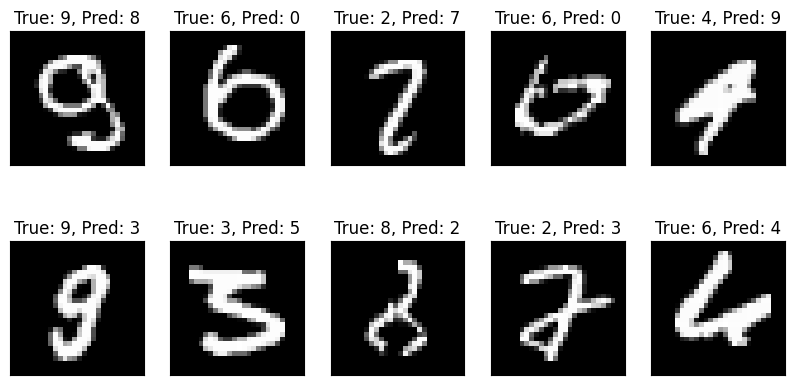


 Test Set: Accuracy: 99.0700%, test_loss: 0.0004172200258482917 



Epoch 11 Loss=0.0722: 100%|██████████| 938/938 [04:09<00:00,  3.76it/s, loss=0.0722, train_accuracy=97.3] 


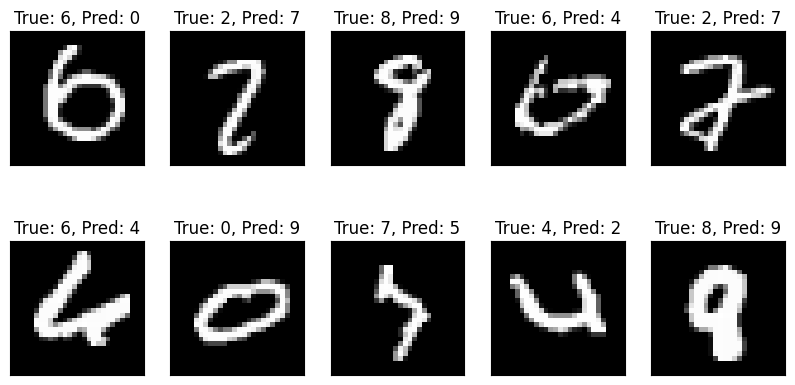


 Test Set: Accuracy: 99.2000%, test_loss: 0.00035913770653132817 



Epoch 12 Loss=0.0619: 100%|██████████| 938/938 [04:06<00:00,  3.80it/s, loss=0.0619, train_accuracy=97.5] 


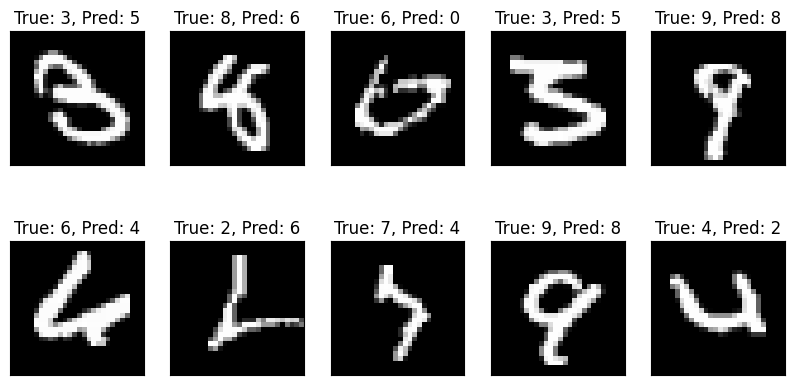


 Test Set: Accuracy: 99.0800%, test_loss: 0.00039583181726557084 



Epoch 13 Loss=0.1266: 100%|██████████| 938/938 [04:10<00:00,  3.74it/s, loss=0.127, train_accuracy=97.6]  


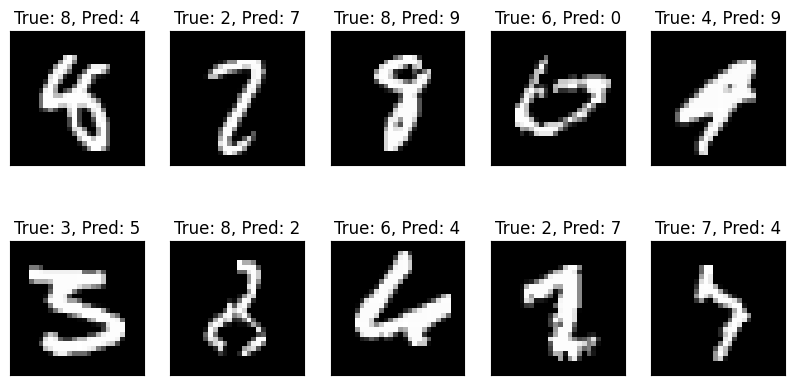


 Test Set: Accuracy: 99.1700%, test_loss: 0.0003858005427979151 



Epoch 14 Loss=0.0267: 100%|██████████| 938/938 [04:11<00:00,  3.73it/s, loss=0.0267, train_accuracy=97.6] 


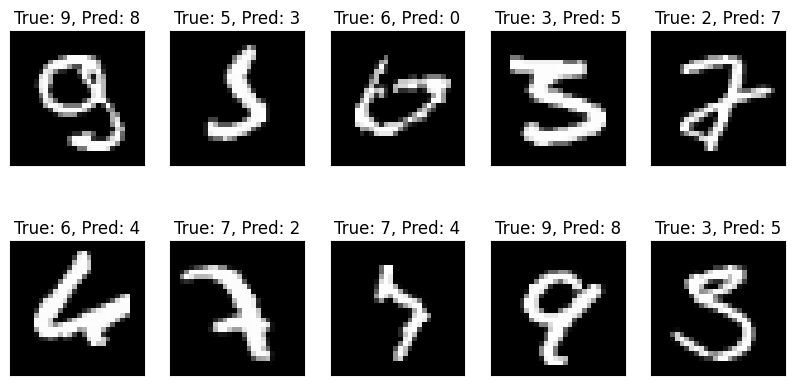


 Test Set: Accuracy: 99.3400%, test_loss: 0.0002928973363988916 



Epoch 15 Loss=0.0288: 100%|██████████| 938/938 [04:13<00:00,  3.69it/s, loss=0.0288, train_accuracy=97.7] 


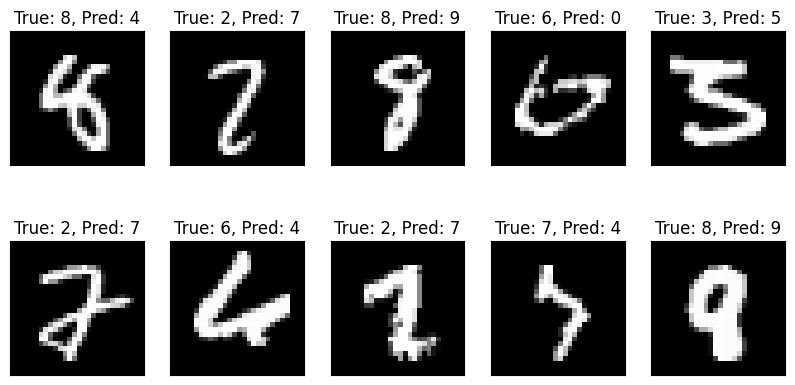


 Test Set: Accuracy: 99.2200%, test_loss: 0.0003810078739437813 



Epoch 16 Loss=0.0795: 100%|██████████| 938/938 [04:13<00:00,  3.71it/s, loss=0.0795, train_accuracy=97.7] 


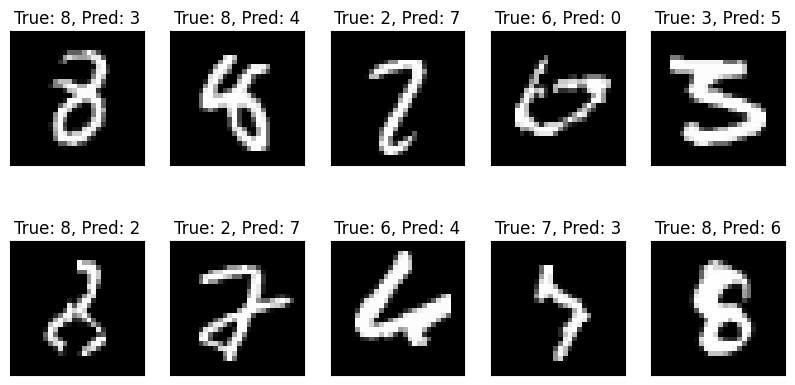


 Test Set: Accuracy: 99.2600%, test_loss: 0.0003320362321619541 



Epoch 17 Loss=0.0294:  87%|████████▋ | 814/938 [03:38<00:11, 10.48it/s, loss=0.0294, train_accuracy=97.8] 

In [ ]:
for epoch in range(1, config.epochs + 1):
    train(net, device, trainloader, optimizer, epoch)
    test_accuracy = test(net, device, testloader)
wandb.finish()